Problem statement (SMART)


1. Specific
- Meningkatkan pendapatan dari data perilaku danb preferensi pelanggan
2. Measurable
- Meningkatkan 20% penjualan 
3. Achievable
- Meningkatkan penjualan menu berdasarkan trend yang sedang berlangsung
4. Relevant
- Meningkatkan potensi dari menu yang sedang trend dapat meningkatkan pendapatan restoran
5. Time Bound
- Dapat dicapai pada quarter selanjutnya

Identifikasi Masalah

Topik permasalahan
- Sebagai data scientist, client kali ini berasal dari restoran di India yang memiliki data untuk diolah dan meminta insight atas data yang akan diolah tersebut, sehingga dari insight tersebut restoran dapat mengetahui bagaimana preferensi pelanggan, apa yang perlu ditingkatkan, atau diperbaiki agar dapat mengoptimalkan pemasukan restoran.

Problem statement
- Mengetahui Preferensi dan Perilaku Konsumsi Makanan dan minuman di Balaji Fast Food di India dalam kurun waktu tahun 2022-2023

1. Makanan apa yang menjadi sumber pemasukan terbesar restoran?
2. Minuman apa yang menjadi pemasukan terbesar restoran
3. Bagaimana perilaku pemilihan makanan dan minuman berdasarkan waktu pembelian?
4. Bagaimana perilaku pemiilihan minuman berdasarkan waktu pembelian?
5. Apakah kuantitas berpengaruh pada jumlah transaksi yang dikeluarkan?



Data loading
- Dataset ini berasal dari kaggle
- https://www.kaggle.com/datasets/rajatsurana979/fast-food-sales-report/data

In [2]:
# read dataset

import pandas as pd

df = pd.read_csv('Balaji Fast Food Sales.csv')

df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [3]:
print(df['item_name'].unique())

print(df['item_type'].unique())

print(df['item_price'].unique())

['Aalopuri' 'Vadapav' 'Sugarcane juice' 'Panipuri' 'Frankie' 'Sandwich'
 'Cold coffee']
['Fastfood' 'Beverages']
[20 25 50 60 40]


- Hanya terdapat 2 kategori menu yaitu fastfood, dan beverages
- Terdapat 7 menu yang terdiri dari 5 makanan yaitu Aalopuri, Vadapav, Panipuri, Frankie, Sandwich
dan 2 jenis minuman yaitu Sugarcane juice dan Cold coffee

Data cleaning

In [4]:
null_count = df.isnull().sum()
print(null_count)

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64


In [5]:
# drop missing value 

new_df = df.dropna()

new_df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [6]:
new_df.to_csv('balaji_fast_food_sales.csv', index=False)

In [7]:
new_df = pd.read_csv('balaji_fast_food_sales.csv')
new_df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
1,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
2,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
3,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
4,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening


In [8]:
# memperbaiki value date dengan replace pemisah format agar konsisten dan dapat diconvert

new_df['date'] = new_df['date'].str.replace('/', '-')


new_df



,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,2,8-23-2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
1,3,11-20-2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
2,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
3,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
4,6,11-14-2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
888,992,10-21-2022,Sandwich,Fastfood,60,5,300,Cash,Mr.,Morning
889,993,7-17-2022,Frankie,Fastfood,50,3,150,Online,Mrs.,Night
890,994,11-01-2022,Panipuri,Fastfood,20,2,40,Online,Mrs.,Evening
891,995,6-18-2022,Sugarcane juice,Beverages,25,1,25,Online,Mr.,Night


In [9]:
# convert data type column date dari object menjadi datetime

new_df['date'] = pd.to_datetime(new_df.date)

new_df['date']



0     2022-08-23
1     2022-11-20
2     2023-02-03
3     2022-10-02
4     2022-11-14
         ...    
888   2022-10-21
889   2022-07-17
890   2022-11-01
891   2022-06-18
892   2022-05-29
Name: date, Length: 893, dtype: datetime64[ns]

Analisis dan perhitungan

In [10]:
# Central tendency

print('item price')
print('mean item price :', new_df['item_price'].mean())
print('median item price :', new_df['item_price'].median())
print('modus item price :', new_df['item_price'].mode())

print('----------------------')
print('transaction amount')
print('mean transaction amount :', new_df['transaction_amount'].mean())
print('median transaction amount :', new_df['transaction_amount'].median())
print('modus transaction amount :', new_df['transaction_amount'].mode())





item price
mean item price : 33.359462486002236
median item price : 25.0
modus item price : 0    20
Name: item_price, dtype: int64
----------------------
transaction amount
mean transaction amount : 272.6035834266517
median transaction amount : 240.0
modus transaction amount : 0    300
Name: transaction_amount, dtype: int64


In [11]:
# measurement of dispersion
# standar deviasi

print('item price standar deviation:', new_df['item_price'].std())

print('transaction amount standar deviation:', new_df['transaction_amount'].std())

item price standar deviation: 15.000807621830539
transaction amount standar deviation: 202.45763457771565


In [12]:
# normality test

# item price 

print('item price')
print('skewness item price:', new_df['item_price'].skew())
print('kurtosis item price:', new_df['item_price'].kurtosis())
print('\n')

# transaction amount

print('transaction amount')
print('skewness transaction amount:', new_df['transaction_amount'].skew())
print('kurtosis transaction amount:', new_df['transaction_amount'].kurtosis())


item price
skewness item price: 0.6205197112466679
kurtosis item price: -1.1924517976419096


transaction amount
skewness transaction amount: 1.0701954176444866
kurtosis transaction amount: 0.711647393463644


data moderatly skewed dan tidak normal

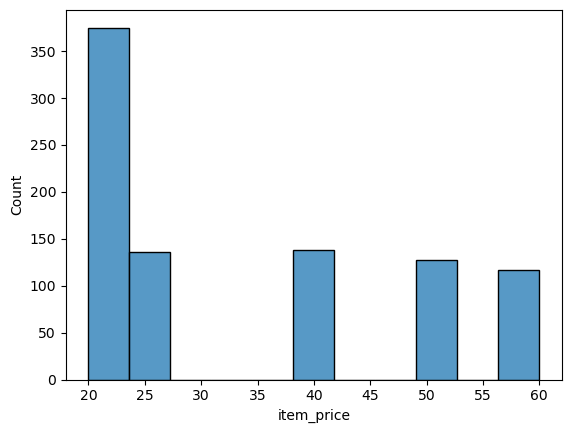

In [13]:
# visualisasi data


import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(new_df['item_price'])
plt.show()

Visualisasi di atas merupakan persebaran data pada item price, dapat diketahui bahwa harga item/menu di kisaran 20 hingga 60 dengan catatan tidak ada item yang memiliki harga 30-35 dan 45 serta 55. serta jika dilihat dari persebaran tersebut, terlihat bahwa jumlah item yang terjual paling banyak yaitu item yang memiliki harga 20

<Axes: >

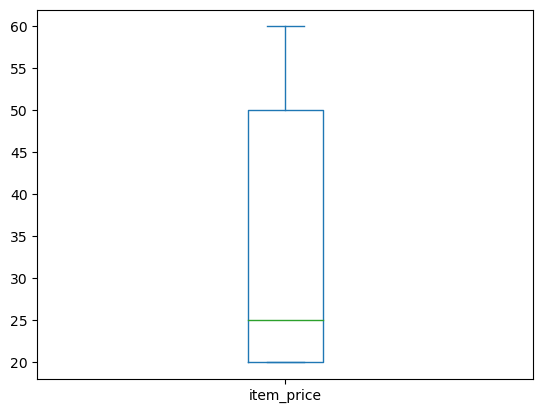

In [89]:
fig = plt
new_df['item_price'].plot(kind='box')

In [91]:
# outliers & extreme value analysis

# tukey's rule

# item price

q1 = new_df['item_price'].quantile(0.25)
q3 = new_df['item_price'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr


print(f'upper boundary: {up_bound:.2f}')
print(f'lower boundary: {low_bound:.2f}')

outlier = new_df['item_price'][(new_df['item_price']<low_bound) | (new_df['item_price']>up_bound)]
no_outlier = new_df['item_price'][(new_df['item_price']>=low_bound) & (new_df['item_price']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(new_df["item_price"]):.2f}%%')






upper boundary: 95.00
lower boundary: -25.00
Percentage of outliers: 0.00%%


In [92]:
# outliers & extreme value analysis

# tukey's rule

# transaction amount

q1 = new_df['transaction_amount'].quantile(0.25)
q3 = new_df['transaction_amount'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr


print(f'upper boundary: {up_bound:.2f}')
print(f'lower boundary: {low_bound:.2f}')

outlier = new_df['transaction_amount'][(new_df['transaction_amount']<low_bound) | (new_df['transaction_amount']>up_bound)]
no_outlier = new_df['transaction_amount'][(new_df['transaction_amount']>=low_bound) & (new_df['transaction_amount']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(new_df["transaction_amount"]):.2f}%%')


upper boundary: 720.00
lower boundary: -240.00
Percentage of outliers: 4.26%%


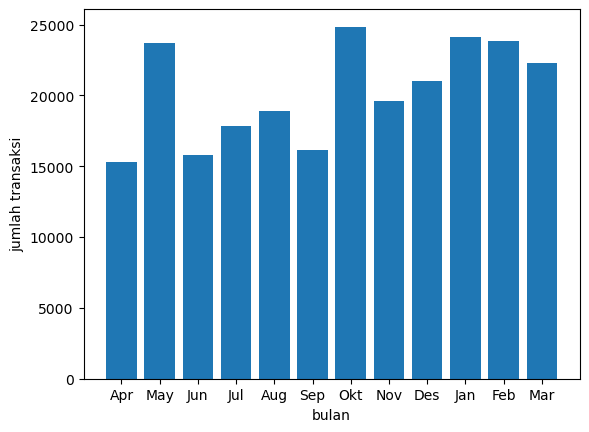

In [61]:
# Bar chart jumlah transaksi per bulan

new_df['bulan'] = new_df['date'].dt.to_period('M')

order_bulan = sorted(new_df['bulan'].unique())
new_df['bulan'] = pd.Categorical(new_df['bulan'], categories=order_bulan, ordered=True)

transaksi_per_bulan = new_df.groupby('bulan')['transaction_amount'].sum()
transaksi_per_bulan = transaksi_per_bulan.sort_index()

plt.bar(transaksi_per_bulan.index.astype(str), transaksi_per_bulan.values)
plt.xlabel('bulan')
plt.ylabel('jumlah transaksi')
plt.xticks(range(0, 12), ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des', 'Jan', 'Feb', 'Mar'])
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


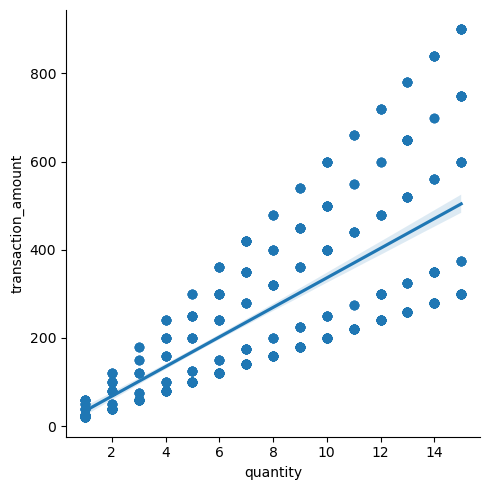

In [18]:
# Scatter plot korelasi kuantitas dan jumlah transaksi

sns.lmplot(data=new_df,x='quantity', y='transaction_amount')

Dari visualisasi scatter plot diatas, diketahui terdapat hubungan positif antara kuantitas dan jumlah total transaksi, dimana semakin banyak jumlah item yang dibeli, semakin banyak jumlah total transaksi.

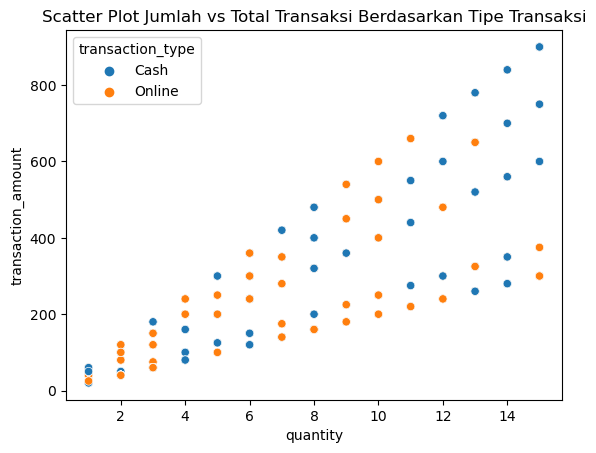

In [22]:
# scatter plot kuantitas dan jumlah traqnsaksi berdasarkan tipe transakasi


sns.scatterplot(x='quantity', y='transaction_amount', hue='transaction_type', data=new_df)
# Lakukan hal yang sama untuk tipe transaksi lainnya

# Tambahkan label dan judul
plt.xlabel('quantity')
plt.ylabel('transaction_amount')
plt.title('Scatter Plot Jumlah vs Total Transaksi Berdasarkan Tipe Transaksi')
plt.show()

Dari visualisi scatter plot diatas yang dikategorikan berdasarkan tipe transaksi(cash dan online), diketahui terdapat kecenderungan customer menggunakan tipe transaksi cash untuk jumlah transaksi yang banyak.

In [23]:
new_df.to_csv('dataframe_balaji_sales.csv', index=False)

In [32]:
print(f'r-correlation (pearson): {new_df["item_price"].corr(new_df["transaction_amount"]):.2f}')

print(f'rhoe-correlation (spearman): {new_df["item_price"].corr(new_df["transaction_amount"], method="spearman"):.2f}')



r-correlation (pearson): 0.63
rhoe-correlation (spearman): 0.57


Statistik inferensial

In [62]:
# korelasi item price dengan transaction amount


# hipotesis
print('H0 : tidak ada korelasi antara harga item dan jumlah transaksi')
print('H1 : terdapat korelasi antara harga item dan jumlah transaksi')
print('--------------------------')

from scipy.stats import pearsonr

korelasi, p_value = pearsonr(new_df['item_price'], new_df['transaction_amount'])

print(f'korelasi pearson: {korelasi:.2f}')
print(f'p-value: {p_value:.4f}')


from scipy.stats import spearmanr

corelation, p_val = spearmanr(new_df['item_price'], new_df['transaction_amount'])
print(f'korelasi spearman: {corelation:.2f}')
print(f'p_val: {p_val:.4f}')
print('\n')
print('jika p-value < 0.05 = H0 ditolak')
print(f'{p_val:4f} < 0.05 ')
print('H0 ditolak')
print('sehingga, terdapat korelasi antara harga item dengan jumlah total transakasi')


H0 : tidak ada korelasi antara harga item dan jumlah transaksi
H1 : terdapat korelasi antara harga item dan jumlah transaksi
--------------------------
korelasi pearson: 0.63
p-value: 0.0000
korelasi spearman: 0.57
p_val: 0.0000


jika p-value < 0.05 = H0 ditolak
0.000000 < 0.05 
H0 ditolak
sehingga, terdapat korelasi antara harga item dengan jumlah total transakasi


Pengambilan Kesimpulan
1. Tren penjualan berdasarkan data yang dianalisis divisualisasikan, menunjukkan transaksi tertinggi terjadi pada saat malam hari, sehingga Balaji Restaurant perlu mempertimbangkan untuk menambah menu yang cocok dimalam hari, seperti hot coffee agar transaksi dimalam hari menjadi lebih maksimal.

2. Persentase jenis transaksi menunjukkan bahwa customer lebih banyak menggunakan jenis transaksi cash, yaitu sebesar 53% dan terdapat kecenderungan semakin tinggi nilai transaksi, customer memilih metode pembayaran secara cash. Sehingga Balaji Food Restaurant sebaiknya menyiapkan pecahan uang kembalian sehingga metode pembayaran secara cash tidak terhambat.

3. Perlu mempertimbangkan untuk menambah menu, terutama pada menu minuman karena saat ini hanya terdapat 2 menu minuman sehingga customer tidak memiliki banyak piilihan. Sebagai alternatif menu minuman, restoran dapat menambah menu jus selain jus tebu, dikarenakan penjualan es jus tebu tinggi pada siang hari, sehingga untuk dapat meningkatkan potensi pendapatan dari minuman, dapat menambah menu minuman jus lain yang cocok diminum di siang hari yang panas.

4. Sebaiknya menu restoran berada di kisaran harga 20, dikarenakan berdasarkan data tren transaksi menunjukkan menu dengan harga 20 terjual lebih banyak dibanding menu dengan harga yang lebih tinggi. Sehingga diperlukan penyesuaian menu seperti penggantian menu mahal yang tidak terlalu diminati customer menjadi menu yang harganya lebih bersahabat dan dapat dijangkau semua kalangan. 

Link Dashboard Tableau

https://public.tableau.com/views/TrendTransaksiApril2022-Maret2023/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link